In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
from sqlalchemy import create_engine, inspect

In [11]:
# create the inspector and connect it to the engine

inspector = inspect(engine)

In [12]:
# Collect the names of tables within the database

inspector.get_table_names()

['measurement', 'station']

In [13]:
# Using the inspector to print the column names within the measurement table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Using the inspector to print the column names within the station table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Display first 5 rows from measurements table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
# Display first 5 rows from station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [17]:
# Find count of number of results being analyzed.

precipitation_count = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").count()

print(" There are {} results being analyzed over the past 12 months".format(precipitation_count))

 There are 2230 results being analyzed over the past 12 months


In [18]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results. Select only
# the date and prcp values

precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23")

In [19]:
# Save the query results as a Pandas DataFrame
# df = pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind)

#precipitation_df = pd.read_sql(precipitation_data, engine)
precipitation_df = pd.read_sql(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").statement,session.bind)
precipitation_df.head(15)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df.set_index("date", inplace=True)
precipitation_df.head(15)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [21]:
#Count the number of NaN in the dataframe
precipitation_df.isnull().sum()

prcp    209
dtype: int64

In [22]:
#Remove the NaN from the dataframe
precipitation_df.dropna(inplace=True)
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [23]:
# Sort the DataFrame by date
precipitation_df.sort_values("date", inplace = True)
precipitation_df.head(15)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


In [24]:
# convert time
precipitation_df.index=pd.to_datetime(precipitation_df.index)

<IPython.core.display.Javascript object>


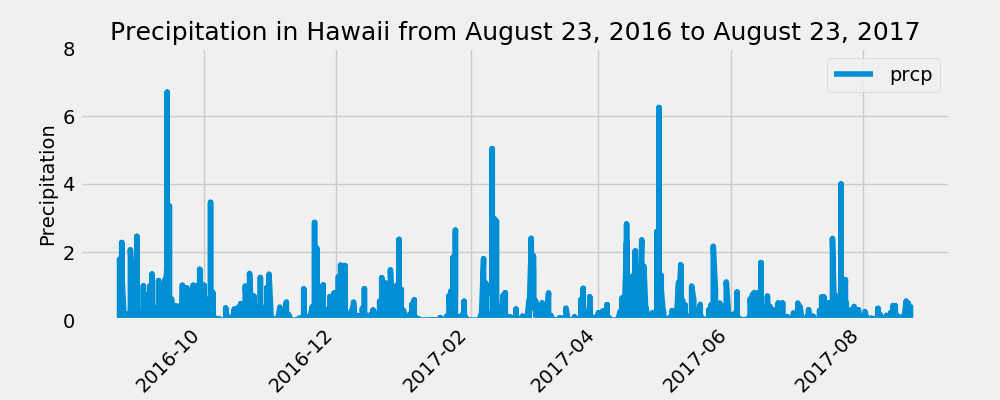

<function matplotlib.pyplot.show(*args, **kw)>

In [26]:
precipitation_df.plot(use_index = True, figsize=(10,4), rot=45)
plt.title('Precipitation in Hawaii from August 23, 2016 to August 23, 2017', fontsize =18)
plt.ylabel('Precipitation', fontsize =14)
plt.xlabel('Date', fontsize =14)
plt.ylim(0,8)
plt.xticks()

plt.savefig("Precipitation in Hawaii.png")

plt.show

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis 

In [28]:
# How many stations are available in this dataset?

station_count = session.query(Station.id).count()

print(" There are {} stations within the data set".format(station_count))

 There are 9 stations within the data set


In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.

station_count2 = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

station_count2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

station_count_stats = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),\
func.avg(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()
station_count_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_tobs = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-23').all()


In [32]:
# Return the total number of tobs for USC00519281
len(station_tobs)
print(" There are {} tobs within the data set".format(len(station_tobs)))

 There are 352 tobs within the data set


In [33]:
# Create a dataframe from the query above
station_df = pd.read_sql(session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-23').statement,session.bind)
station_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<IPython.core.display.Javascript object>


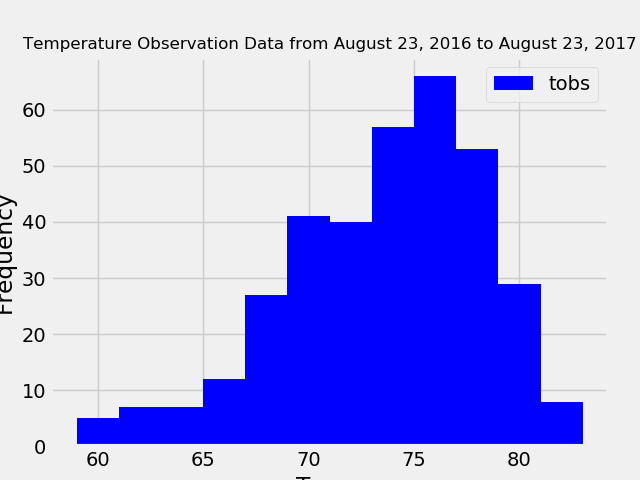

<function matplotlib.pyplot.show(*args, **kw)>

In [34]:
station_df.plot.hist(bins=12, color='b')
plt.title("Temperature Observation Data from August 23, 2016 to August 23, 2017", fontsize=12)
plt.ylabel("Frequency")
plt.xlabel("Temp")

plt.savefig("Histogram Chart of tobs.png")

plt.show

## Optional Challenge Assignment

In [35]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


<IPython.core.display.Javascript object>


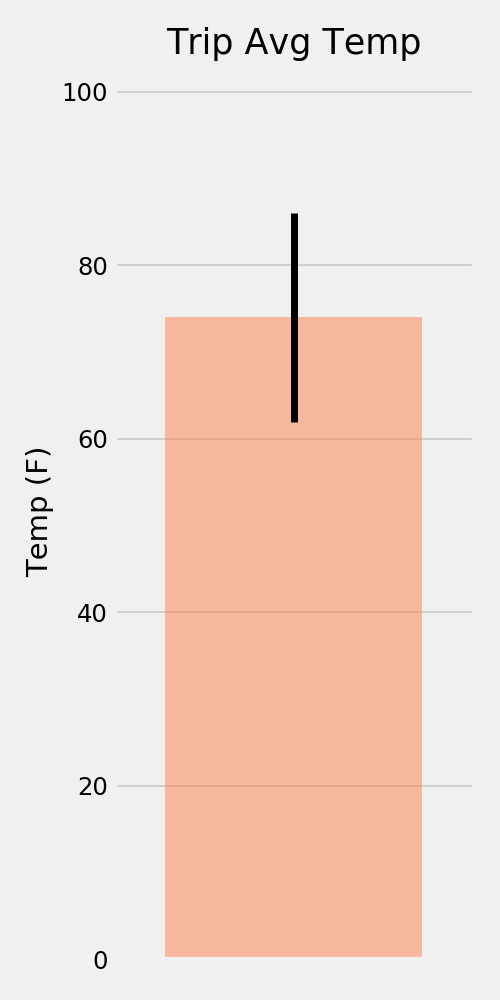

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


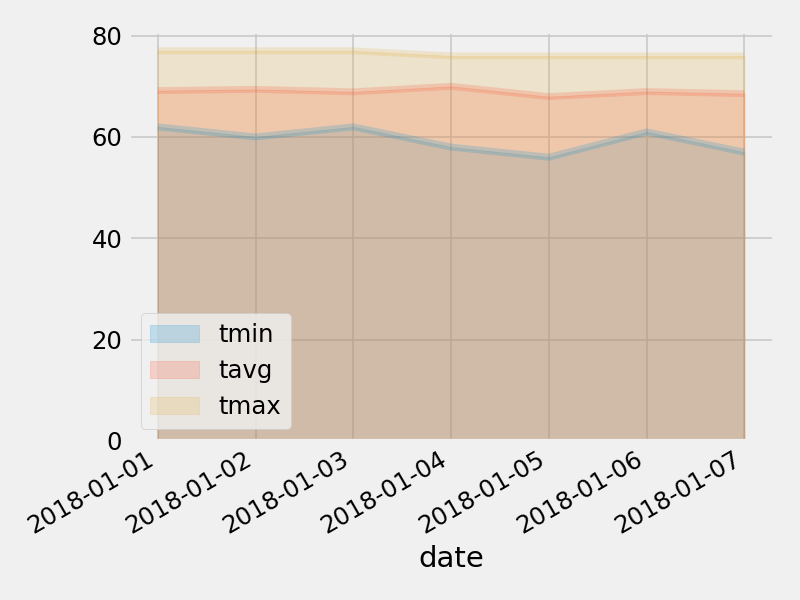

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
